<h1 style="text-align:center">
    Movies
</h1>

<br>

<font color="darkblue">

<h3 style="text-align:center">
    Florencia Ayala Quinteiro
</h3>
    
<h3 style="text-align:center">
    7 de noviembre 2024
</h3>

<hr>

# Introducción

<br>

En este proyecto se desarrolla en Python un análisis básico de datos sobre películas de cine de IMDB.
El set de datos que vamos a usar inicialmente se encuentra en la siguiente página:

https://www.kaggle.com/datasets/carolzhangdc/imdb-5000-movie-dataset

En ella puede encontrarse información más detallada, así como una descripción precisa de cada columna.

<font color="green">
Seguidamente, te toca a ti hacer una breve introducción, completando el fragmento de letra en azul y desarrollándolo a tu antojo. Suprime después este fragmento en verde.
</font>

<br>

Se plantean los apartados iniciales para su resolución *sin usar la libreria pandas*. Esto se propone así para forzar a practicar con las técnicas, herramientas y conceptos básicos de Python. Más adelante, hay otros apartados propuestos para su resolución con esta librería y otras.

<br>

<font color="darkblue">
A partir de los datos proporcionados, he conseguido ... pero no he podido ...

<br>

Aunque al final de este notebook detallaré la calificación que calculo honestamente, globalmente, siguiendo las puntuaciones que se asigna a cada apartado, diría que he obtenido una nota de *** sobre 10.
</font>

<br>

<font color="green">
Completa tus datos personales en la cabecera, bajo el rótulo inicial. Completa también el breve apartado anterior, con texto  azul, y pon en azul todos los comentarios tuyos, dejando en negro los míos, del enunciado. También, suprime los fragmentos en verde, como éste, que son indicaciones pero que, una vez atendidas, deben desaparecer de la solución que entregas.
</font>

# Datos de partida

(**Nota previa:** hasta el apartado específico de dataframes, se deben desarrollar las soluciones a los ejercicios propuestos sin usar la librería `pandas`, justamente para obligar a practicar con conceptos básicos de Python.)

Nuestra tabla de datos es el archivo de texto `movie_data.csv` que se encuentra en la carpeta `data_in`, y puede verse así con cualquier editor:

<br>

<center>
    <img src="./images/texto.png" width="100%">
</center>

La primera fila es la cabecera.
Esta fila cabecera contiene los nombres de los campos, separados por comas.
Yo la he marcado en azul para distinguirla fácilmente de las demás filas, que contienen los datos propiamente dichos,
esto es, los valores de dichos campos, consignando los datos de cada película en cada línea.

Si abrimos esta tabla con *excell* (importar datos csv con el separador `,`), vemos cada dato en una celda.

<br>

<center>
    <img src="./images/csv_1.png" width="100%">
</center>

<br>

Mostramos la hoja excell en dos imágenes por ser muy ancha.

<br>

<center>
    <img src="./images/csv_2.png" width="100%">
</center>

# Librerías y constantes globales

<br>

Pongamos todas las librerías necesarias al principio, tal como propone el estilo `pep-8`. Ej.:
<a href="https://www.python.org/dev/peps/pep-0008/">PEP 8 -- Style Guide for Python Code</a>.
    
De paso, en éste y otros lugares de Internet podrás encontrar detalles sobre estilo y presentación de código con un estilo estándar y cuidado. Examina esta página y trata de seguir esas indicaciones.

In [1]:
# Instalación de bibliotecas

!pip install chardet folium matplotlib pandas requests beautifulsoup4

In [2]:
# Librerías:

# Esta celda debe ser completada por el estudiante

# Importaciones de bibliotecas estándar
import csv
import io
import os
import re
from collections import Counter, defaultdict

# Importaciones de bibliotecas de terceros
import chardet
import folium
import matplotlib.pyplot as plt
import pandas as pd
import requests
from bs4 import BeautifulSoup


In [3]:
# Constantes globales
# Esta celda debe ser completada por el estudiante

MOVIES_DATA = r'./data_in/movie_data.csv'
FILE_PATH = r'./data_in/'
FEW_FIELDS = "algunos_campos.txt"
MAPA_ES = r'./data_in/es.csv'

# Lista de cabeceras esperadas
CABECERA_ESPERADA = [
    'movie_title', 'title_year', 'director_name',
    'actor_1_name', 'language', 'country',
    'color', 'budget', 'imdb_score',
    'movie_imdb_link'
]

FILTRO_DF = [
    'movie_title', 'color', 'director_name', 
    'language', 'country', 'actor_1_name', 
    'movie_imdb_link'
]

MAIN_DICT_DATA = []

# Variables globales
urls = []
actor_list = []

# Parte A. Ejercicios básicos sin usar `pandas` [2 puntos]

Esta parte inicial debe realizarse sin usar la librería `pandas`. Para practicar con esta librería, se plantean otros apartados más abajo.

### A.1. Exploración inicial básica del archivo de datos

Deseamos cargar el archivo de datos, que tiene un formato `csv`.
En este apartado, te recomiendo fuertemente usar la librería `cvs`,
que deberás importar en la primera celda del script, más arriba, no aquí.
(En los siguientes apartados, ya no mencionaré qué librerías usar
ni recordaré dónde se han de importar.)

Observa también que el test de funcionamiento te da el nombre de la función que deber definir
y algún otro identificador como es, por ejemplo, la constante `MOVIES_DATA`,
que debes definir también más arriba, en la segunda celda de este script.

Finalmente, observando el test, verás que se carga por separado la cabecera y las filas de datos.

In [4]:
# Esta celda debe ser completada por el estudiante

def load_full_data(filename):
    """
    Carga el archivo CSV y devuelve la cabecera y una lista de filas de datos.

    Parámetros
    ----------
    filename : str
        La ruta al archivo CSV.
    
    Returns
    -------
    tupla
        Una tupla que contiene la cabecera (list) y la lista de datos completa (list of lists).
    """
    
    with open(filename, 'rb') as csv_file:
        byte = csv_file.read()
        encoding = chardet.detect(byte)

    with open(filename, 'r', encoding=encoding['encoding']) as csv_file:
        reader = csv.reader(csv_file)
        full_header = next(reader)
        full_list_data = [row for row in reader]
    
    return full_header, full_list_data


In [5]:
# Test de funcionamiento

full_header, full_list_data = load_full_data(MOVIES_DATA)

print(full_header)
print()
print(full_list_data[0:5])

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

[['Color', 'James Cameron', '723', '178', '0', '855', 'Joel David Moore', '1000', '760505847', 'Action|Adventure|Fantasy|Sci-Fi', 'CCH Pounder', 'Avatar\xa0', '886204', '4834', 'Wes Studi', '0', 'avatar|future|marine|native|paraplegic', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1', '3054', 'English', 'USA', 'PG-13', '237000000', '2009', '936', '7.9', '1.78', '33000'], ['Color', 'Gore Verbinski', '302', '169', '563', '1000', 'Orlando Bloom', '40000', '309404152', 'Action|Adventure|F

Ahora, querríamos ver las posiciones de los identificadores de los campos, dados en la línea cabecera.

In [6]:
# Esta celda debe ser completada por el estudiante

list_of_enumerated_headers = list(enumerate(full_header))

In [7]:
# Test de funcionamiento

print(list_of_enumerated_headers)

[(0, 'color'), (1, 'director_name'), (2, 'num_critic_for_reviews'), (3, 'duration'), (4, 'director_facebook_likes'), (5, 'actor_3_facebook_likes'), (6, 'actor_2_name'), (7, 'actor_1_facebook_likes'), (8, 'gross'), (9, 'genres'), (10, 'actor_1_name'), (11, 'movie_title'), (12, 'num_voted_users'), (13, 'cast_total_facebook_likes'), (14, 'actor_3_name'), (15, 'facenumber_in_poster'), (16, 'plot_keywords'), (17, 'movie_imdb_link'), (18, 'num_user_for_reviews'), (19, 'language'), (20, 'country'), (21, 'content_rating'), (22, 'budget'), (23, 'title_year'), (24, 'actor_2_facebook_likes'), (25, 'imdb_score'), (26, 'aspect_ratio'), (27, 'movie_facebook_likes')]


### A.2. Campos principales de una película

Los campos (columnas) del archivo son demasiados. No nos interesan todos ellos. Dada una lista con todos los campos, se pide extraer otra lista sólo con los campos con los que vamos a trabajar en los siguientes apartados: `movie_title`, `title_year`, `director_name`, `actor_1_name`, `language`, `country`, `color`, `budget`, `imdb_score` y `movie_imdb_link`.

In [8]:
# Esta celda debe ser completada por el estudiante

def main_data_from_item(full_header=None, full_list_data=None):
    """
    Extrae datos relevantes de una fila de datos dada, según el encabezado.

    Parámetros
    ----------
    full_header : list, opcional
        La lista de nombres de columnas (encabezado) del archivo CSV. 
        Si no se proporciona, se utilizará None.
    
    full_list_data : list, opcional
        La lista de valores de una fila específica del archivo CSV. 
        Si no se proporciona, se utilizará None.
    
    Returns
    -------
    list
        Una lista con los datos relevantes extraídos de la fila o encabezado.
    """
    
    # Se Obtiene los índices de las columnas de interés.
    indices = [full_header.index(col) for col in CABECERA_ESPERADA if col in full_header]
    
    # Caso 1: proporcionando solo full_header.
    if full_header is not None and full_list_data is None:
        return [full_header[i] for i in indices]

    # Caso 2: proporcionando full_list_data.
    elif full_list_data is not None:
        return [full_list_data[i] for i in indices]

In [9]:
# Test de funcionamiento

print(main_data_from_item(full_header=full_header))

print()

datos_avatar_2009 = main_data_from_item(full_header=full_header,full_list_data=full_list_data[0])
print(datos_avatar_2009)

print()

datos_star_wars_7 = main_data_from_item(full_header=full_header,full_list_data=full_list_data[4])
print(datos_star_wars_7)

['movie_title', 'title_year', 'director_name', 'actor_1_name', 'language', 'country', 'color', 'budget', 'imdb_score', 'movie_imdb_link']

['Avatar\xa0', '2009', 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', '237000000', '7.9', 'http://www.imdb.com/title/tt0499549/?ref_=fn_tt_tt_1']

['Star Wars: Episode VII - The Force Awakens\xa0            ', '', 'Doug Walker', 'Doug Walker', '', '', '', '', '7.1', 'http://www.imdb.com/title/tt5289954/?ref_=fn_tt_tt_1']


### A.3. Algunos ajustes en los campos

Observa la anomalía en el string del título de la película. También, queremos tratar algunos campos como numéricos, ya sea enteros (el año y el presupuesto) o reales (la valoración). (Algunos campos numéricos enteros están vacíos en el archivo de datos; para ellos, el valor imputado será `-1`.) Además, en las urls de las películas no necesitaremos el fragmento final, iniciado con `?ref_`.

In [10]:
# Esta celda debe ser completada por el estudiante

def datatypes_arranged(full_list_data):
    """
    Limpia y convierte los datos de una película a los tipos adecuados.

    Esta función toma una lista que contiene información sobre una película, 
    limpia caracteres no deseados y convierte campos específicos en enteros 
    o flotantes según sea necesario. Los campos vacíos se imputan con -1.

    Parámetros
    ----------
    full_list_data : list
        Lista que contiene los datos de la película.

    Returns
    -------
    list
        Lista con los datos de la película limpiados y convertidos.
    """
    
    # Limpieza de caracteres no deseados
    clean_data = [re.sub(r'Â|\xa0', '', item).strip() for item in full_list_data]

    # Imputamos -1 para campos vacíos y convertimos tipos de datos
    clean_data[1] = int(clean_data[1]) if clean_data[1] else -1 
    clean_data[7] = int(clean_data[7]) if clean_data[7] else -1  
    clean_data[8] = float(clean_data[8]) if clean_data[8] else -1 

    # Eliminación de fragmentos finales en la URL
    clean_data[9] = re.sub(r'\?ref_.*', '', clean_data[9])

    return clean_data

In [11]:
# Test de funcionamiento

print(datatypes_arranged(datos_avatar_2009))

print(datatypes_arranged(datos_star_wars_7))


['Avatar', 2009, 'James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
['Star Wars: Episode VII - The Force Awakens', -1, 'Doug Walker', 'Doug Walker', '', '', '', -1, 7.1, 'http://www.imdb.com/title/tt5289954/']


### A.4. Recuperación de alguna información básica

<br>

Diseña funciones para recuperar la siguiente información:

<itemize>
    <li> El conjunto de valores posibles del campo `Color`.
    <li> Los títulos de película de nuestro archivo (limpios de caracteres extraños),
        junto con la cantidad de calificadores (un entero), que contengan la subcadena "Victor".
</itemize>

In [12]:
# Esta celda debe ser completada por el estudiante

def colores():
    """
    Extrae colores de la lista de datos.
    
    Returns
    -------
    set
        Conjunto de colores únicos extraídos de la lista de datos.
    """
    colores_extraidos = [fila[0] for fila in full_list_data]
    colores = set(colores_extraidos)
    return colores


def pelis():
    """
    Busca las películas que contienen 'Victor' en el título y extrae sus reseñas.

    Returns
    -------
    list
        Lista de tuplas (título, reseña) para las películas que contienen 'Victor' 
        en el título.
    """
    nombres = [re.sub(r'Â|\xa0', '', fila[11]).strip() for fila in full_list_data]
    
    # Lista de tuplas (nombre, reseña) para las películas que contienen 'Victor'
    peliculas_victor = [
        (nombres[i], full_list_data[i][2])  # Las reseñas están en la columna 2
        for i in range(len(nombres))
        if 'Victor' in nombres[i]
    ]
    return peliculas_victor


# Ejecución de las funciones
colores = colores()
pelis_victor = pelis()

In [13]:
# Test de funcionamiento

print(colores)
print(pelis_victor)

{'', 'Color', ' Black and White'}
[('Victor Frankenstein', '159'), ('Victor Frankenstein', '159'), ('The Young Victoria', '188'), ('Victor Frankenstein', '159'), ('Raising Victor Vargas', '59')]


# B Datos en un diccionario [2 puntos]

### B.1. Carga únicamente de datos que vamos a usar

En lugar de cargar *todos* los datos del archivo, luego generar otro archivo con los datos que nos interesan y luego ajustarlos, es mejor diseñar una función que recorre el archivo de datos y, de cada línea del archivo, *únicamente* retiene la parte que nos interesa, cargando la cabecera por un lado y, por otro, la lista de datos de interés, ajustados como ya hemos dicho.

Cargaremos esta información en un diccionario, cuyas claves serán pares `(título, año)` y cuyos valores se recogen en una lista con el resto de los campos.

Además, los datos de cada película tras la clave `(título, año)` están repetidas en el archivo de datos, con todos los datos idénticos; y lo que es peor: alguna que está repetida, pero con algún dato distinto. En ambos casos, para simplificar, adoptamos el criterio de registrar únicamente la primera aparición de los datos de una misma película y año.

In [14]:
# Esta celda debe ser completada por el estudiante

def load_main_data(archivo):
    """
    Carga datos de películas desde un archivo CSV y organiza los datos en un diccionario.

    La función detecta la codificación del archivo, lee los datos, limpia los caracteres no deseados,
    y organiza los datos en un diccionario con claves únicas (título y año).

    Parámetros
    ----------
    archivo : str
        Ruta del archivo CSV que contiene los datos de las películas.

    Returns
    -------
    tuple
        Una tupla con la cabecera esperada (list) y el diccionario de datos de películas (dict).
    """
    
    # Inicialización del diccionario que contendrá los datos
    peliculas_dict = {}

    # Detección de la codificación del archivo
    with open(archivo, 'rb') as csv_file:
        byte = csv_file.read()
        encoding = chardet.detect(byte)

    # Se abre el archivo con la codificación detectada
    with open(archivo, 'r', encoding=encoding['encoding']) as f:
        lector = csv.reader(f)
        
        # Lectura de la cabecera
        cabecera = next(lector)
        
        # Se crea un índice para acceder a los campos por su nombre
        indices = {nombre: idx for idx, nombre in enumerate(cabecera)}

        for fila in lector:
            # Limpieza de caracteres no deseados de cada campo en la fila
            fila = [re.sub(r'Â|\xa0', '', item).strip() for item in fila]

            # Limpieza del campo de enlace para quitar parámetros de referencia (?ref_)
            fila[indices['movie_imdb_link']] = re.sub(r'\?ref_.*', '', fila[indices['movie_imdb_link']])

            # Se crea la clave como una tupla de título y año
            titulo = fila[indices['movie_title']]
            año = int(fila[indices['title_year']]) if fila[indices['title_year']].isdigit() else -1
            clave = (titulo, año)

            # Se crea una lista con los datos de interés
            datos = [
                fila[indices['director_name']],
                fila[indices['actor_1_name']],
                fila[indices['language']],
                fila[indices['country']],
                fila[indices['color']],
                int(fila[indices['budget']]) if fila[indices['budget']].isdigit() else -1,
                float(fila[indices['imdb_score']]) if fila[indices['imdb_score']].replace('.', '', 1).isdigit() else -1,
                fila[indices['movie_imdb_link']]
            ]


            if clave not in peliculas_dict:
                peliculas_dict[clave] = datos

    return cabecera, peliculas_dict
 

In [15]:
# Test de funcionamiento

main_header, main_dict_data = load_main_data(MOVIES_DATA)

print(main_header)
print()
for title_year, pieces in list(main_dict_data.items())[:5]:
    print(title_year, " -> ", pieces)

['color', 'director_name', 'num_critic_for_reviews', 'duration', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'actor_3_name', 'facenumber_in_poster', 'plot_keywords', 'movie_imdb_link', 'num_user_for_reviews', 'language', 'country', 'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score', 'aspect_ratio', 'movie_facebook_likes']

('Avatar', 2009)  ->  ['James Cameron', 'CCH Pounder', 'English', 'USA', 'Color', 237000000, 7.9, 'http://www.imdb.com/title/tt0499549/']
("Pirates of the Caribbean: At World's End", 2007)  ->  ['Gore Verbinski', 'Johnny Depp', 'English', 'USA', 'Color', 300000000, 7.1, 'http://www.imdb.com/title/tt0449088/']
('Spectre', 2015)  ->  ['Sam Mendes', 'Christoph Waltz', 'English', 'UK', 'Color', 245000000, 6.8, 'http://www.imdb.com/title/tt2379713/']
('The Dark Knight Rises', 2012)  ->  ['Christo

Y ahora podemos suprimir la variable `full_list_data`

In [16]:
# Esta celda debe ser completada por el estudiante

try:
    del full_list_data  # Se intenta eliminar la variable
except NameError:
    pass  # Si no existe

In [17]:
# Test de funcionamiento

try:
    print(full_list_data)
except:
    print('La variable full_list_data está suprimida correctamente')

La variable full_list_data está suprimida correctamente


### B.2. Recuperación de alguna información 

Diseña funciones para averiguar la siguiente información:

- ¿Qué títulos de películas han sido dirigidas por "James Cameron" (o por el director que se desee)?

In [18]:
# Esta celda debe ser completada por el estudiante

def movies_anno_for_director(main_dict_data, director):
    """
    Devuelve una lista de títulos de películas dirigidas por un director específico.

    Parámetros
    ----------
    main_dict_data : dict
        Diccionario con los datos de las películas, donde las claves son tuplas 
        (título, año) y los valores son listas con detalles de cada película.

    director : str
        Nombre del director a buscar.

    Returns
    -------
    list
        Lista de títulos de películas dirigidas por el director especificado.
    """
    return [title for title, details in main_dict_data.items() if director in details[0]]


In [19]:
# Test de funcionamiento
    
movies_anno_for_director(main_dict_data, "James Cameron")

[('Avatar', 2009),
 ('Titanic', 1997),
 ('Terminator 2: Judgment Day', 1991),
 ('True Lies', 1994),
 ('The Abyss', 1989),
 ('Aliens', 1986),
 ('The Terminator', 1984)]

- ¿Qué directores han dirigido el número máximo de películas?

In [20]:
# Esta celda debe ser completada por el estudiante

def directors_max_movies(main_dict_data):
    """
    Encuentra el o los directores con la mayor cantidad de películas.

    Parámetros
    ----------
    main_dict_data : dict
        Diccionario que contiene los datos de las películas, donde cada clave 
        es una tupla (título, año) y el valor es una lista con detalles de la película.

    Returns
    -------
    tuple
        Una tupla que contiene una lista de directores con la mayor cantidad de 
        películas y el conteo máximo de películas.
    """
    # Filtrar directores, eliminando las cadenas vacías
    directors = [details[0] for title, details in main_dict_data.items() if details[0]]
    
    # Contar cuántas veces aparece cada director
    director_counts = Counter(directors)
    
    # Encontrar el número máximo de películas
    max_count = max(director_counts.values())
    
    # Encontrar todos los directores con ese número máximo de películas
    max_directors = [director for director, count in director_counts.items() if count == max_count]
    
    return max_directors, max_count

In [21]:
# Test de funcionamiento
    
print(directors_max_movies(main_dict_data))

(['Steven Spielberg'], 26)


- Para cada año de un intervalo dado de años, ¿cuántas películas se han realizado? Esta información debe recuperrase en un diccionario convencional (no por defecto), y luego debe mostrarse en una lista con los años en orden ascendente..

In [22]:
# Esta celda debe ser completada por el estudiante

def years_num_movies(main_dict_data, year_begin, year_end):
    """
    Cuenta el número de películas por año en un rango de años especificado.

    Parámetros
    ----------
    main_dict_data : dict
        Diccionario que contiene los datos de las películas, donde cada clave
        es una tupla (título, año) y el valor es una lista con detalles de la película.

    year_begin : int
        Año de inicio del rango.

    year_end : int
        Año de fin del rango.

    Returns
    -------
    dict
        Diccionario con los años en el rango especificado como claves y el conteo
        de películas en cada año como valores. Solo incluye años con al menos una película.
    """
    # Inicializar un diccionario para almacenar los conteos de películas por año
    years_count = {year: 0 for year in range(year_begin, year_end + 1)}
    
    # Contar las películas en el rango de años especificado
    for title, details in main_dict_data.items():
        if year_begin <= title[1] <= year_end:
            years_count[title[1]] += 1
            
    # Filtrar el diccionario para que solo contenga años con películas
    filtered_years_count = {year: count for year, count in years_count.items() if count > 0}
    
    return filtered_years_count

In [23]:
# Test de funcionamiento
    
num_movies = years_num_movies(main_dict_data, 2000, 2015)

print(num_movies)

{2000: 169, 2001: 183, 2002: 204, 2003: 169, 2004: 207, 2005: 216, 2006: 235, 2007: 198, 2008: 223, 2009: 253, 2010: 225, 2011: 224, 2012: 214, 2013: 231, 2014: 243, 2015: 211}


In [24]:
# Esta celda debe ser completada por el estudiante

def num_movies_sorted():
    """
    Convierte el diccionario `num_movies` a una lista de tuplas ordenada por año y la devuelve.

    Returns
    -------
    list
        Lista de tuplas (año, número de películas) ordenada por año.
    """
    return sorted(list(num_movies.items()))

num_movies_sorted = num_movies_sorted()

In [25]:
# Test de funcionamiento
    
print(num_movies_sorted)

[(2000, 169), (2001, 183), (2002, 204), (2003, 169), (2004, 207), (2005, 216), (2006, 235), (2007, 198), (2008, 223), (2009, 253), (2010, 225), (2011, 224), (2012, 214), (2013, 231), (2014, 243), (2015, 211)]


- Diseña también una operación que, partiendo de nuestro diccionario de los datos principales, almacene en un archivo los datos siguientes de cada película, sin la cabecera: el título, el idioma, el año, el país y el presupuesto. El separador será en este caso el carácter `|`. El archivo usado para el almacenamiento es el siguiente:

    ``` python
    FEW_FIELDS = "algunos_campos.txt"
    ```

In [26]:
# Esta celda debe ser completada por el estudiante

def store_file(main_dict_data,FEW_FIELDS):
    """
    La función escribe en un archivo una selección de campos para cada película,
    separados por un delimitador de barra vertical ('|').

    Parámetros
    ----------
    main_dict_data : dict
        Diccionario con los datos de las películas. Las claves son tuplas (título, año)
        y los valores son listas de detalles de cada película.

    few_fields : str
        Ruta del archivo donde se almacenarán los datos seleccionados.
    """
    with open(FEW_FIELDS,'w') as file:
        for title, value in main_dict_data.items():
            line = f"{title[0].strip()}|{title[1]}|{value[2]}|{value[3]}|{value[5]}"
            file.write(line + '\n') 

In [27]:
# Test de funciomaniemto

store_file(main_dict_data, FEW_FIELDS)

! dir algunos*.*

print()

with open(FEW_FIELDS) as f:
    for i in range(5):
        print(f.readline())


Avatar|2009|English|USA|237000000

Pirates of the Caribbean: At World's End|2007|English|USA|300000000

Spectre|2015|English|UK|245000000

The Dark Knight Rises|2012|English|USA|250000000

Star Wars: Episode VII - The Force Awakens|-1|||-1



### B.3. Un conteo sencillo con `defaultdict`

Deseamos saber con qué directores y número de veces ha actuado cada actor como actor principal. Se pide realizar este conteo en un `defaultdict` cuyas claves serán nombres de los actores y cuyos valores tendrán la estructura de un `defaultdict`, cuyas claves serán los nombres de los directores y cuyos valores serán los núneros contabilizados.

In [28]:
# Esta celda debe ser completada por el estudiante

def actor_directors(main_dict_data):
    """
    La función crea un diccionario anidado que registra cuántas veces cada 
    actor ha trabajado con cada director.

    Parámetros
    ----------
    main_dict_data : dict
        Diccionario con los datos de las películas. Las claves son tuplas (título, año)
        y los valores son listas de detalles de cada película.

    Returns
    -------
    defaultdict
        Diccionario anidado que mapea cada actor a otro diccionario que contiene
        los directores y el número de colaboraciones con cada uno.
    """
    collaborations = defaultdict(lambda: defaultdict(int))
    for title, value in main_dict_data.items():
        actor = value[1]
        director = value[0]
        
        # Incrementa el contador de colaboraciones
        collaborations[actor][director] += 1
    return collaborations

In [29]:
# Test de funcionamiento

num_collaborations = actor_directors(main_dict_data)

print(type(num_collaborations))
key_a, value_a = list(num_collaborations.items())[0]
print(type(key_a), type(value_a))
key_b, value_b = list(value_a.items())[0]
print(type(key_b), type(value_b))

print()

print(num_collaborations)

<class 'collections.defaultdict'>
<class 'str'> <class 'collections.defaultdict'>
<class 'str'> <class 'int'>

defaultdict(<function actor_directors.<locals>.<lambda> at 0x00000248006C9550>, {'CCH Pounder': defaultdict(<class 'int'>, {'James Cameron': 1, 'Peter Hyams': 1, 'Fred Dekker': 1, 'Ernest R. Dickerson': 1}), 'Johnny Depp': defaultdict(<class 'int'>, {'Gore Verbinski': 5, 'Rob Marshall': 2, 'Tim Burton': 6, 'James Bobin': 1, 'Michael Mann': 1, 'Florian Henckel von Donnersmarck': 1, 'Wally Pfister': 1, 'David Koepp': 2, 'Scott Cooper': 1, 'Albert Hughes': 1, 'Roman Polanski': 1, 'Wes Craven': 1, 'Mike Newell': 1, 'Rand Ravich': 1, 'Ted Demme': 1, 'Robert Rodriguez': 1, 'Marc Forster': 1, 'Jeremy Leven': 1, 'Laurence Dunmore': 1, 'Terry Gilliam': 1, 'Lasse Hallström': 1, 'Oliver Stone': 1, 'Rachel Talalay': 1, 'Kevin Smith': 2}), 'Christoph Waltz': defaultdict(<class 'int'>, {'Sam Mendes': 1, 'David Yates': 1, 'Michel Gondry': 1, 'Tim Burton': 1}), 'Tom Hardy': defaultdict(<class

### B.4. Print seleccionado

Demasiada información. Deseamos imprimir únicamente, para cada actor, las colaboraciones que superen un mínimo, dato entrada. Si un actor no tiene ninguna colaboración que supere dicho mínimo, lógicamente no debe mostrarse.

In [30]:
# Esta celda debe ser completada por el estudiante

def actor_directors(main_dict_data):
    """
    La función crea un diccionario anidado que registra cuántas veces cada 
    actor ha trabajado con cada director.

    Parámetros
    ----------
    main_dict_data : dict
        Diccionario con los datos de las películas. Las claves son tuplas (título, año)
        y los valores son listas de detalles de cada película.

    Returns
    -------
    defaultdict
        Diccionario anidado que mapea cada actor a otro diccionario que contiene
        los directores y el número de colaboraciones con cada uno.
    """
    collaborations = defaultdict(lambda: defaultdict(int))
    for title, value in main_dict_data.items():
        actor = value[1]  
        director = value[0]  
        collaborations[actor][director] += 1
    return collaborations

def print_collaborations_over_min(collaborations, min_collaborations):
    """
    La función recorre el diccionario de colaboraciones y muestra aquellas en las que
    un actor ha trabajado con un director al menos el número especificado de veces.

    Parámetros
    ----------
    collaborations : defaultdict
        Diccionario anidado de colaboraciones entre actores y directores.

    min_collaborations : int
        Número mínimo de colaboraciones requerido para que se imprima la relación.
    """
    for actor, director in collaborations.items():
        # Se filtra directores que superen el mínimo especificado `min_collaborations`
        filtered_directors = [(director, count) for director, count in director.items() if count >= min_collaborations]
        
        # Solo se imprime si hay directores que cumplen el criterio
        if filtered_directors:
            print(f"{actor} -> {filtered_directors}")
       
# Ejecución de las funciones   
num_collaborations = actor_directors(main_dict_data)
print_collaborations_over_min(num_collaborations, min_collaborations=5)


Johnny Depp -> [('Gore Verbinski', 5), ('Tim Burton', 6)]
Leonardo DiCaprio -> [('Martin Scorsese', 5)]
Robert De Niro -> [('Martin Scorsese', 7)]
Bill Murray -> [('Wes Anderson', 5)]
Clint Eastwood -> [('Clint Eastwood', 10)]
Woody Allen -> [('Woody Allen', 10)]


# C. Algunos gráficos sencillos [1 punto]


### C.1 Un modelo de gráfica

Vamos a diseñar un modelo de gráfica sencillo que nos sirva para las siguientes representaciones. Tomará como parámetro una lista de pares $(x, y)$, y opcionalmente los tres rótulos explicativos que necesitamos incluir. Además, queremos que las etiquetas de las abcisas aparezcan inclinadas, para poder luego mostrar intervalos de edad.

Las pruebas de funcionamiento te darán más información que las explicaciones que pueda yo dar aquí.  

In [31]:
# Esta celda debe ser completada por el estudiante

def representar_xxx_yyy(data, labels=None):
    """
    La función crea una gráfica de línea para los datos proporcionados, con etiquetas de ejes y título opcionales.

    Parámetros
    ----------
    data : lista de tuplas
        Lista de pares (x, y) que representan los datos a graficar.

    labels : lista de str, opcional
        Lista de etiquetas en el siguiente orden: [title, ylabel, xlabel].
        Si no se proporciona o es incompleta, no se añaden el título o etiquetas faltantes.
    """
    # Se separan los datos en dos listas usando zip()
    x, y = zip(*data)
    
    # Configuración de la figura
    plt.figure(figsize=(8, 4))
    plt.plot(x, y)
    
    # Se aplican título y etiquetas de ejes si se proporcionan
    if labels:
        if len(labels) > 0 and labels[0]:
            plt.title(labels[0])
        if len(labels) > 1 and labels[1]:
            plt.ylabel(labels[1])
        if len(labels) > 2 and labels[2]:
            plt.xlabel(labels[2])
            
    # Inclinación de las etiquetas del eje X
    plt.xticks(rotation=15)    
    
    # Cuadrícula y gráfica        
    plt.grid(True)
    plt.show()
    

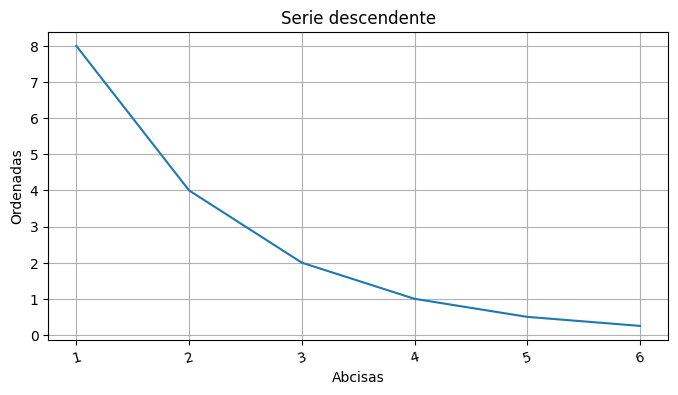

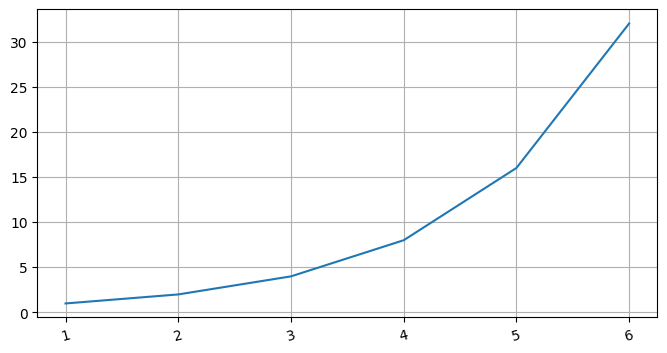

In [32]:
# Pruebas de funcionamiento:

representar_xxx_yyy([(1, 8), (2, 4), (3, 2), (4, 1), (5, 0.5), (6, 0.25)], ["Serie descendente", "Ordenadas", "Abcisas"])

representar_xxx_yyy([(1, 1), (2, 2), (3, 4), (4, 8), (5, 16), (6, 32)])

### Una gráfica concreta

Deseamos representar el número de películas de nuestra base de datos que se han producido en un intervalo de años dado.

In [33]:
# Esta celda debe ser completada por el estudiante

def repr_movies_years(main_dict_data,year_beginning, year_ending):
    """
    La función cuenta cuántas películas hay para cada año en el rango dado y
    crea una gráfica de línea para mostrar los resultados.

    Parámetros
    ----------
    main_dict_data : dict
        Diccionario con los datos de las películas. Las claves son tuplas (título, año)
        y los valores son listas de detalles de cada película.

    year_beginning : int
        Año de inicio del rango.

    year_ending : int
        Año de fin del rango.
    """
    year_counts = Counter()
    
    # Cuenta las películas por año dentro del rango especificado
    for (title, year), data in main_dict_data.items():
        if year_beginning <= year <= year_ending:
            year_counts[year] += 1

    # Se crea una lista completa de años en el rango y se rellena con ceros si falta algún año.
    all_years = list(range(year_beginning, year_ending + 1))
    all_counts = [year_counts.get(year, 0) for year in all_years]

    # Configuración de la figura
    plt.figure(figsize=(8, 4))
    plt.plot(all_years, all_counts)
    plt.xlabel('years')
    plt.ylabel('num. movies in a year')
    
    # Título con separación adicional usando `pad`
    plt.title('Number of movies in our database', pad=20)
    
    # Inclinación de las etiquetas del eje X
    plt.xticks(all_years, rotation=45)
    
    # Cuadrícula y gráfica        
    plt.grid(True)
    plt.show()


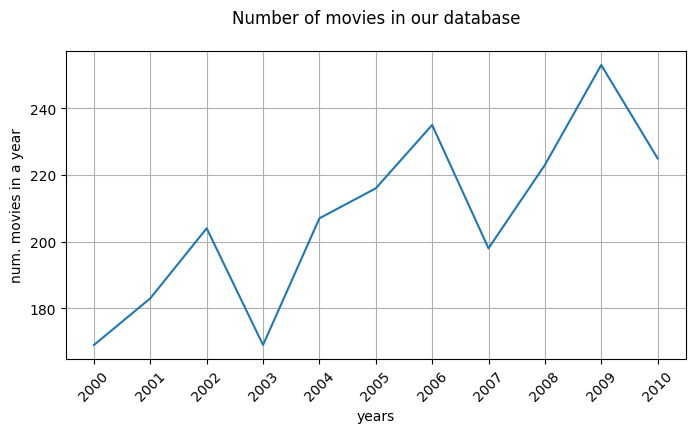

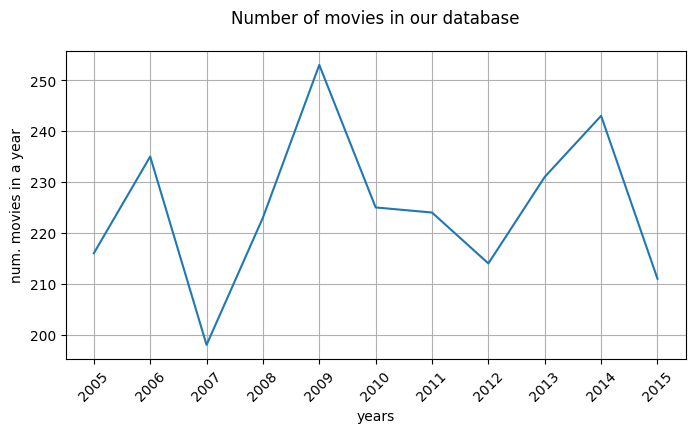

In [34]:
# Test de funcionamiento

repr_movies_years(main_dict_data, 2000, 2010)
repr_movies_years(main_dict_data, 2005, 2015)

# D. Acceso a las urls de imdb y webscraping [2 puntos]

### D.1. Recuperación de las URLs

Con sencillas instrucciones, deseamos recuperar todas las *urls* de las películas de nuestro archivo, mostrando cuántas son, la primera de ellas o las diez primeras por ejemplo:

In [35]:
# Esta celda debe ser completada por el estudiante

def movie_urls():
    """
    La función extrae las URLs de las películas del diccionario principal de datos.

    Returns
    -------
    list
        Lista de URLs de películas.
    """
    
    for (title, year), data in main_dict_data.items():
        urls.append(data[7])
    return urls

# Se obtienen las URLs llamando a la función `movie_urls()`.
urls = movie_urls()

# La primera URL se obtiene del primer elemento de la lista
first_url_movie = urls[0] if urls else None  

# Las primeras diez URLs se obtienen de los primeros diez elementos de la lista
first_ten_urls = urls[:10]


In [36]:
# Test de funcionamiento

print(len(urls))

print()

print(first_url_movie)

print()

print(first_ten_urls)

4919

http://www.imdb.com/title/tt0499549/

['http://www.imdb.com/title/tt0499549/', 'http://www.imdb.com/title/tt0449088/', 'http://www.imdb.com/title/tt2379713/', 'http://www.imdb.com/title/tt1345836/', 'http://www.imdb.com/title/tt5289954/', 'http://www.imdb.com/title/tt0401729/', 'http://www.imdb.com/title/tt0413300/', 'http://www.imdb.com/title/tt0398286/', 'http://www.imdb.com/title/tt2395427/', 'http://www.imdb.com/title/tt0417741/']


In [37]:
# Una forma de evitar el error "Requests 403 forbidden" al hacer web scraping en las siguientes celdas:

HEADERS = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0",
        "Accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8",
        "Accept-Language": "en-US,en;q=0.5",
        "Accept-Encoding": "gzip, deflate",
        "Connection": "keep-alive",
        "Upgrade-Insecure-Requests": "1",
        "Sec-Fetch-Dest": "document",
        "Sec-Fetch-Mode": "navigate",
        "Sec-Fetch-Site": "none",
        "Sec-Fetch-User": "?1",
        "Cache-Control": "max-age=0",
    }

### D.2. Carga de la estructura sintáctica de una URL

Ahora, deseamos extraer el código `html` de una película.

In [38]:
# Esta celda debe ser completada por el estudiante

# Desactivar warnings de verificación de SSL
requests.packages.urllib3.disable_warnings()

def soup_movie(first_url_movie):
    """
    La función obtiene el contenido HTML de la URL de la película especificada.

    Parámetros
    ----------
    first_url_movie : str
        URL de la película.

    Returns
    -------
    str
        Contenido HTML de la página de la película.
    """
    return requests.get(first_url_movie, headers=HEADERS, verify=False).text

In [39]:
# Test de funcionamiento

soup = soup_movie(first_url_movie)

print(str(soup)[:1000])
print()
print("... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ... ...")
print()
print(str(soup)[-1000:])

<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === 'function'){ uet('bb', 'LoadTitle', {wb: 1}); }</script><script>window.addEventListener('load', (event) => {
        if (typeof window.csa !== 'undefined' && typeof window.csa === 'function') {
            var csaLatencyPlugin = window.csa('Content', {
                element: {
                    slotId: 'LoadTitle',
                    type: 'service-call'
                }
            });
            csaLatencyPlugin('mark', 'clickToBodyBegin', 1731008632299);
        }
    })</script><title>Avatar (2009) - IMDb</title><meta name="description" content="Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following

### D.3. Extracción de algunas piezas de información de una URL

Y ahora, con dicho código, deseamos extraer la siguiente información, referida a la película `first_url_movie`:

- La etiqueta completa del título de la película
- La descripción (sólo el contenido).
- La lista de los actores del *reparto principal*
- La información sobre el presupuesto

In [40]:
# Esta celda debe ser completada por el estudiante

# Se crea el objeto BeautifulSoup
soup_pequenno_codigo = BeautifulSoup(soup, "lxml")

# Se extrae el título
title = soup_pequenno_codigo.find('title').text if soup_pequenno_codigo.find('title') else 'No title found'

# Se extrae la descripción
description = (
    soup_pequenno_codigo.find('meta', {'name': 'description'})['content']
    if soup_pequenno_codigo.find('meta', {'name': 'description'}) else 'No description found'
)

# Se extrae los actores
soup_actores = soup_pequenno_codigo.find_all('a', {'data-testid': 'title-cast-item__actor'})

# Se imprimen los resultados
print(title, "\n")
print(description, "\n")
print([actor.text for actor in soup_actores], "\n")
print(soup_pequenno_codigo.find_all('span', {'class': 'ipc-metadata-list-item__list-content-item'})[2].text)


Avatar (2009) - IMDb 

Avatar: Directed by James Cameron. With Sam Worthington, Zoe Saldana, Sigourney Weaver, Stephen Lang. A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home. 

['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver', 'Michelle Rodriguez', 'Stephen Lang', 'Giovanni Ribisi', 'Joel David Moore', 'CCH Pounder', 'Wes Studi', 'Laz Alonso', 'Dileep Rao', 'Matt Gerald', 'Sean Anthony Moran', 'Jason Whyte', 'Scott Lawrence', 'Kelly Kilgour', 'James Patrick Pitt', 'Sean Patrick Murphy'] 

$237,000,000 (estimated)


### D.4. Actores que intervienen en una lista de URLs

Necesitamos crear un archivo con los actores del reparto principal de las películas de IMDB, dada la lista de sus URLs.

In [41]:
# Esta celda debe ser completada por el estudiante

def gather_actors(archivo, urls):
    """
    La función extrae los nombres de actores de una lista de URLs y los guarda en un archivo.

    Parámetros
    ----------
    archivo : str
        Ruta del archivo donde se guardarán los nombres de los actores.

    urls : lista de str
        Lista de URLs de las películas desde las cuales se extraerán los nombres de los actores.
    """
    # Se recorre cada URL y se extraen los nombres de actores
    for url in urls:
        soup = soup_movie(url)
        
        # Se crea el objeto BeautifulSoup
        soup_pequenno_codigo = BeautifulSoup(soup, "lxml")
        
        actor_soup = soup_pequenno_codigo.find_all('a', {'data-testid': 'title-cast-item__actor'})
        
        # Se extraen los nombres de los actores
        actor_names = [tag.text.strip() for tag in actor_soup]

        # Se agregan los nombres extraídos a la lista global `actor_list`
        actor_list.extend(actor_names)

    # Se guardan los nombres de los actores en el archivo            
    with open(archivo,'w') as file:
        for actor in actor_list:
            file.write(actor + '\n')

    for actor in actor_list:
        print(actor)
            

In [42]:
# Test de funcionamiento

# OJO: esta operación puede llevar bastante tiempo.
# Para esta prueba, usamos un número limitado de películas.

gather_actors("actors_3_first_movies.txt", urls[:3])

! type actors_3_first_movies.txt

Sam Worthington
Zoe Saldana
Sigourney Weaver
Michelle Rodriguez
Stephen Lang
Giovanni Ribisi
Joel David Moore
CCH Pounder
Wes Studi
Laz Alonso
Dileep Rao
Matt Gerald
Sean Anthony Moran
Jason Whyte
Scott Lawrence
Kelly Kilgour
James Patrick Pitt
Sean Patrick Murphy
Johnny Depp
Orlando Bloom
Keira Knightley
Geoffrey Rush
Jack Davenport
Bill Nighy
Jonathan Pryce
Lee Arenberg
Mackenzie Crook
Kevin McNally
David Bailie
Stellan Skarsgård
Tom Hollander
Naomie Harris
Martin Klebba
David Schofield
Lauren Maher
Dermot Keaney
Daniel Craig
Christoph Waltz
Léa Seydoux
Ralph Fiennes
Monica Bellucci
Ben Whishaw
Naomie Harris
Dave Bautista
Andrew Scott
Rory Kinnear
Jesper Christensen
Alessandro Cremona
Stephanie Sigman
Tenoch Huerta
Adriana Paz
Domenico Fortunato
Marco Zingaro
Stefano Elfi DiClaudia


In [43]:
# La siguente llamada llevaría un tiempo realmente largo:

# import time # para cronometrar esta función, que tarda mucho

# reloj_inicio = time.time()
# gather_actors("actors_all_movies.txt", urls)
# reloj_fin = time.time()

# print("Tiempo invertido: %s segundos." % (reloj_fin - reloj_inicio))

# E. Pandas [2 puntos]

### E.1. El primer paso es la carga del archivo en un dataframe

In [44]:
# Esta celda debe ser completada por el estudiante

def load_dataframe(MOVIES_DATA):
    """
    La función carga los datos de un archivo CSV en un DataFrame de pandas.

    Parámetros
    ----------
    movies_data : str
        Ruta del archivo CSV que contiene los datos de las películas.

    Returns
    -------
    DataFrame
        DataFrame de pandas con los datos cargados desde el archivo CSV.
    """
    return pd.read_csv(MOVIES_DATA)

In [45]:
# Test de funcionamiento

tabla_completa = load_dataframe(MOVIES_DATA)

tabla_completa

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


### E.2. Tabla de los campos principales

A partir de la tabla anterior, construimos otra con sólo algunos de los campos:

In [46]:
# Esta celda debe ser completada por el estudiante

def fields_selected_dataframe(tabla_completa):
    """
    La función selecciona columnas específicas de un DataFrame.

    Parámetros
    ----------
    tabla_completa : DataFrame
        DataFrame que contiene los datos completos de las películas.

    Returns
    -------
    DataFrame
        DataFrame con solo las columnas seleccionadas especificadas en `FILTRO_DF`.
    """
    return tabla_completa[FILTRO_DF]

In [47]:
# test de comprobación

tabla_breve = fields_selected_dataframe(tabla_completa)

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,NaN,Doug Walker,NaN,NaN,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,NaN,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.3. Columnas de una tabla

¿Cuáles son las columnas de nuestrsa `tabla_breve`?

In [48]:
# Esta celda debe ser completada por el estudiante

print(tabla_breve.columns)

Index(['movie_title', 'color', 'director_name', 'language', 'country',
       'actor_1_name', 'movie_imdb_link'],
      dtype='object')


### E.4. Campos missing

Algunos campos muestran un valod `NaN`. Deseamos cambiarlo por una cadena de caracteres: `"Desc"`.

In [49]:
# Esta celda debe ser completada por el estudiante

pd.options.mode.chained_assignment = None
tabla_breve.fillna("Desc", inplace=True)

In [50]:
# Test de comprobación

tabla_breve

,movie_title,color,director_name,language,country,actor_1_name,movie_imdb_link
0,Avatar,Color,James Cameron,English,USA,CCH Pounder,http://www.imdb.com/title/tt0499549/?ref_=fn_t...
1,Pirates of the Caribbean: At World's End,Color,Gore Verbinski,English,USA,Johnny Depp,http://www.imdb.com/title/tt0449088/?ref_=fn_t...
2,Spectre,Color,Sam Mendes,English,UK,Christoph Waltz,http://www.imdb.com/title/tt2379713/?ref_=fn_t...
3,The Dark Knight Rises,Color,Christopher Nolan,English,USA,Tom Hardy,http://www.imdb.com/title/tt1345836/?ref_=fn_t...
4,Star Wars: Episode VII - The Force Awakens ...,Desc,Doug Walker,Desc,Desc,Doug Walker,http://www.imdb.com/title/tt5289954/?ref_=fn_t...
...,...,...,...,...,...,...,...
5038,Signed Sealed Delivered,Color,Scott Smith,English,Canada,Eric Mabius,http://www.imdb.com/title/tt3000844/?ref_=fn_t...
5039,The Following,Color,Desc,English,USA,Natalie Zea,http://www.imdb.com/title/tt2071645/?ref_=fn_t...
5040,A Plague So Pleasant,Color,Benjamin Roberds,English,USA,Eva Boehnke,http://www.imdb.com/title/tt2107644/?ref_=fn_t...
5041,Shanghai Calling,Color,Daniel Hsia,English,USA,Alan Ruck,http://www.imdb.com/title/tt2070597/?ref_=fn_t...


### E.5. Director $\rightarrow$ películas y número de películas

Función que averigua la lista de títulos de películas de un director dado:

In [51]:
# Esta celda debe ser completada por el estudiante

def titulos_de_director_df(tabla_breve, director):
    """
    La función filtra el DataFrame para obtener los títulos de las películas dirigidas por un director específico.

    Parámetros
    ----------
    tabla_breve : DataFrame
        DataFrame que contiene los datos de las películas.

    director : str
        Nombre del director cuyas películas se desean filtrar.

    Returns
    -------
    DataFrame
        DataFrame con una columna de títulos de las películas dirigidas por el director especificado.
    """
    filtered_df = tabla_breve.loc[tabla_breve['director_name'] == director]
    return filtered_df[['movie_title']]


In [52]:
# Test de comprobación:

tabla_tits = titulos_de_director_df(tabla_breve, "James Cameron")
tabla_tits

,movie_title
0,Avatar
26,Titanic
288,Terminator 2: Judgment Day
291,True Lies
606,The Abyss
2486,Aliens
3575,The Terminator


In [53]:
list_tits = tabla_tits["movie_title"].to_list()
print(list_tits)

['Avatar\xa0', 'Titanic\xa0', 'Terminator 2: Judgment Day\xa0', 'True Lies\xa0', 'The Abyss\xa0', 'Aliens\xa0', 'The Terminator\xa0']


Deseamos saber qué directores han dirigido el máximo número de películas, junto con ese número de películas.

In [54]:
# Esta celda debe ser completada por el estudiante
def directors_max_movies_df(tabla_breve):
    """
    La función agrupa el DataFrame por director, cuenta el número de películas
    para cada uno, y devuelve el director con el mayor número de películas y 
    dicho conteo.

    Parámetros
    ----------
    tabla_breve : DataFrame
        DataFrame que contiene los datos de las películas.

    Returns
    -------
    tuple
        Una tupla que contiene el nombre del director con el mayor número de 
        películas y el número de películas.
    """
    directors_count = tabla_breve.groupby('director_name')['movie_title'].count().reset_index()
    
    # Se eliminan las filas donde 'director_name' sea 'Desc' y se ordenan en orden descendente por número de películas
    directors_count = directors_count[directors_count['director_name'] != 'Desc']
    directors_count = directors_count.sort_values('movie_title', ascending=False)
    
    return [directors_count['director_name'].iloc[0]], int(directors_count['movie_title'].iloc[0])


In [55]:
# test de comprobación:

directors_max_movies_df(tabla_breve)

(['Steven Spielberg'], 26)

# Parte F. Un cálculo masivo con map-reduce [0,5 puntos]

En este apartado se ha de realizar un programa aparte, *basado en la técnica de map-reduce*, que calcule, para cada idioma, en qué países en que se han producido películas y la suma de los presupuestos de dichas películas. Cuando el idioma o el país o el presupuesto no se conozcan, no se considerará esta película.

    C:\...> python language_budget_countries.py -q algunos_campos.txt

El programa funcionará necesariamente con la técnica map-reduce, que podemos poner en juego con la librería `mrjob`.

El funcionamiento del mismo se puede activar también desde aquí:

In [56]:
pip install mrjob

Note: you may need to restart the kernel to use updated packages.


In [57]:
pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [58]:
# Hagamos una llamada al programa de consola desde aquí:

! python language_budget_countries.py -q algunos_campos.txt

In [59]:
# Para que el resultado se almacene en un archivo:

! python language_budget_countries.py -q algunos_campos.txt > language_countries_budgets.txt

La siguiente celda me permite ver tu programa cómodamente desde aquí.

In [60]:
def print_file(filename):
    with open(filename, "r") as f:
        for line in f:
            print(line, end="")
            
print_file("language_budget_countries.py")

from mrjob.job import MRJob
import logging

# ConfiguraciÃ³n del logger
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

class MRCount(MRJob):
    
    def mapper(self, _, linea):
        """
        La funciÃ³n mapea cada lÃ­nea de entrada y extrae el idioma, paÃ­s y presupuesto.

        ParÃ¡metros
        ----------
        _ : 
            Valor de la clave de entrada (no utilizado).

        linea : str
            LÃ­nea de entrada que se procesarÃ¡.
        """
        campos = linea.split('|')
        
        idioma = campos[2].strip()  
        pais = campos[3].strip()     
        presupuesto_str = campos[4].strip()
        
        try:
            presupuesto = int(presupuesto_str)
        except ValueError:
            logger.warning(f"Valor de presupuesto no vÃ¡lido: {presupuesto_str} para la lÃ­nea: {linea}")
            return

        if idioma and pais and presupuesto >= 0:
            yield idioma, (pais, presupuesto)

    def reducer(s

# Parte G. Un apartado libre [0.5 puntos]


<font color="darkblue">
<h2>Enunciado</h2>
<p>Este ejercicio consiste en cargar y analizar datos geográficos de marcadores de localización en un archivo CSV. El objetivo es crear un mapa centrado en España que muestre estos marcadores, agrupados en clústeres, usando la biblioteca <b>Folium</b>.</p>
</font>

In [65]:
# Este apartado debe ser completado por el estudiante

def load_data(file_path: str) -> pd.DataFrame:
    """
    Carga los datos de un archivo CSV en un DataFrame.
    """
    return pd.read_csv(file_path)

def create_map_add_markers(file_path: str) -> folium.Map:
    """
    Crea un mapa centrado en España y añade marcadores con datos de entrada.
    """
    df = load_data(file_path)
    mapa_es = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

    for _, fila in df.iterrows():
        folium.Marker(location=[fila['lat'], fila['lng']]).add_to(mapa_es)

    return mapa_es

def show_map(mapa: folium.Map) -> folium.Map:
    """
    Devuelve el objeto de mapa de folium.
    """
    return mapa

    

In [66]:
# Pruebas de funcionamiento, también tarea del estudiante:

mapa_es = create_map_add_markers(MAPA_ES)
show_map(mapa_es)

# Datos personales

<br>

<font color="darkblue">

-   **Apellidos:** Ayala Quinteiro
-   **Nombre:** Florencia
-   **Email:** floayala@ucm.es
-   **Fecha:** 7 noviembre 2024

<br>

<font color="black">
    
### Ficha de autoevaluación

<br>

<font color="darkblue">

<p>He logrado completar satisfactoriamente todos los apartados del proyecto, cumpliendo con los requerimientos especificados en el enunciado. Cada sección fue revisada y comprobada para asegurar el correcto funcionamiento.</p>

<table>
  <tr>
    <th>Apartado</th>
    <th>Calificación</th>
    <th>Comentario</th>
  </tr>
  <tr>
    <td>a)</td>
    <td>2.5 / 2.5</td>
    <td>Completamente resuelto</td>
  </tr>
  <tr>
    <td>b)</td>
    <td>2.0 / 2.0</td>
    <td>Completamente resuelto</td>
  </tr>
  <tr>
    <td>c)</td>
    <td>1.5 / 1.5</td>
    <td>Completamente resuelto</td>
  </tr>
  <tr>
    <td>d)</td>
    <td>1.0 / 1.0</td>
    <td>Completamente resuelto</td>
  </tr>
  <tr>
    <td>e)</td>
    <td>2.0 / 2.0</td>
    <td>Completamente resuelto</td>
  </tr>
  <tr>
    <td>f)</td>
    <td>0.5 / 0.5</td>
    <td>Completamente resuelto</td>
  </tr>
  <tr>
    <td>g)</td>
    <td>0.5 / 0.5</td>
    <td>Completamente resuelto</td>
  </tr>
  <tr>
    <td><strong>Total</strong></td>
    <td><strong>10.0 / 10.0</strong></td>
    <td><strong>Aprobado</strong></td>
  </tr>
</table>
</font>

<br>

<font color="darkblue">
    
|Apartado|Calificación|Comentario|
|-|-|-|
|a)  |2.0  / 2.5  |Completamente resuelto |
|b)  |0.0  / 2.0  |No lo he conseguido |
|c)  |0.0  / 1.5  |No he entendido el enunciado |
|d)  |0.25 / 1.0  |Sólo he conseguido una parte mínima |
|e)  |0.0  / 2.0  |No lo he conseguido |
|f)  |0.5  / 0.5  |No lo he conseguido más que mínimamente |
|g)  |0.0  / 0.5  |No he logrado el correcto funcionamiento |
|**Total** |**2.75** / 10.0|**Suspenso**|
</font>

<br>

<font color="black">
   
### Ayuda recibida y fuentes utilizadas
    
</font>

<br>

<font color="darkblue">
<h1>Links de interés</h1>
<h2>Gráficos</h2>
<ul>
    <li><a href="https://stackoverflow.com/questions/18458734/how-do-i-plot-list-of-tuples">https://stackoverflow.com/questions/18458734/how-do-i-plot-list-of-tuples</a></li>
    <li><a href="https://www.programiz.com/python-programming/methods/built-in/zip">https://www.programiz.com/python-programming/methods/built-in/zip</a></li>
    <li><a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html">https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.figure.html</a></li>
</ul>
<h2>BeautifulSoup</h2>
<ul>
    <li><a href="https://stackoverflow.com/questions/39755346/beautiful-soup-extracting-tagged-and-untagged-html-text">https://stackoverflow.com/questions/39755346/beautiful-soup-extracting-tagged-and-untagged-html-text</a></li>
</ul>
</font>


<br>

<font color="black">
    
